Introduction to Computational Medicine I  Imaging
=========================================
Final Project
------------------

\
Alzheimer's Disease- Frontal Lobe


**Group Member:** 

Adam Kenet, Chenyu Gao, Zixuan Wang, Shardul Rakshit

In [1]:
### Data Cleaning

In [2]:
# import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from scipy.stats import zscore

# inline plots
%matplotlib inline

In [3]:
# read the data
dat_all = pd.read_excel('ADNI_ICM_random200.xlsx')
dat_all = dat_all.replace({'\'':''}, regex=True) # remove ' ' from data
dat_all = dat_all.rename(columns=lambda x:x.strip('\'')) # remove ' ' from column names
dat_all.index += 1 # change index to start at 1
#dat_all

In [4]:
# select only the columns of interest
rois = ['IFG_opercularis_L','IFG_opercularis_R','IFG_orbitalis_L','IFG_orbitalis_R','IFG_triangularis_L','IFG_triangularis_R','LFOG_L','LFOG_R','MFG_L','MFG_R','MFOG_L', 'MFOG_R','PrCG_L','PrCG_R','SFG_L',
      'SFG_R']
info = ['Subject_ID', 'Gender', 'Age', 'Diagnosis']
columns = np.concatenate((info, rois), axis=0)
dat = dat_all[columns]
#dat

In [5]:
# split into Alzheimer's group and control group
ad = dat[dat.Diagnosis == 'AD/MCI']
control = dat[dat.Diagnosis == 'NORMAL']
control_male = control[control.Gender == 'M']
control_female = control[control.Gender == 'F']

In [6]:
#ad

In [7]:
#control.describe()

### Characterization of the dataset
- butterfly plot (age distribution)

In [8]:
#determine the number of people in each age group
bin_max = 93
bin_min = 55
bin_gap = 2
hist_ad_female, bin_edges = np.histogram(ad[ad.Gender == 'F']['Age'],bins=np.arange(bin_min,bin_max,bin_gap))
hist_ad_male, bin_edges = np.histogram(ad[ad.Gender == 'M']['Age'],bins=np.arange(bin_min,bin_max,bin_gap))
hist_control_female, bin_edges = np.histogram(control[control.Gender == 'F']['Age'],bins=np.arange(bin_min,bin_max,bin_gap))
hist_control_male, bin_edges = np.histogram(control[control.Gender == 'M']['Age'],bins=np.arange(bin_min,bin_max,bin_gap))

AgeGroup = [] #create a list of age group, strings
for i in bin_edges:
    if i == bin_max - bin_gap: break
    AgeGroup.append(str(i)+ '-' +str(i+bin_gap))

#create a dataframe for plotting
d_gender_diagnosis = {'AgeGroup':AgeGroup,
     'AD_Female':hist_ad_female,
     'AD_Male':hist_ad_male,
     'Control_Female':hist_control_female * -1,
     'Control_Male':hist_control_male *-1}
df_gender_diagnosis = pd.DataFrame(data=d_gender_diagnosis)
df_gender_diagnosis['AD_Tot'] = df_gender_diagnosis['AD_Male'] + df_gender_diagnosis['AD_Female']
df_gender_diagnosis['Control_Tot'] = df_gender_diagnosis['Control_Male'] + df_gender_diagnosis['Control_Female'] 
#df_gender_diagnosis.info()
df_gender_diagnosis_rev = df_gender_diagnosis[::-1] #for plotting

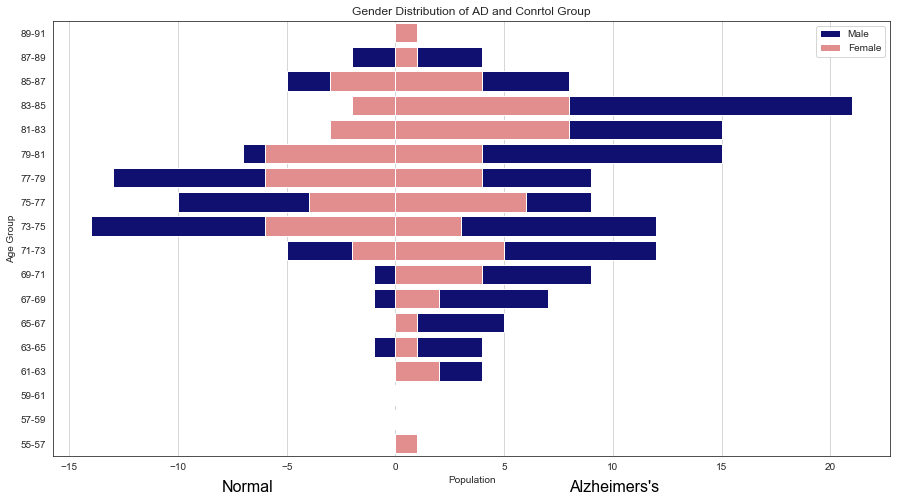

In [9]:
sns.set_style("white")
plt.figure(figsize=(15,8))

bar_plot = sns.barplot(x="AD_Tot",y="AgeGroup", color="navy", label="Male",data = df_gender_diagnosis_rev)
bar_plot = sns.barplot(x="Control_Tot",y="AgeGroup", color="navy", data = df_gender_diagnosis_rev)
bar_plot = sns.barplot(x="AD_Female",y="AgeGroup", color='lightcoral', label="Female",data = df_gender_diagnosis_rev)
bar_plot = sns.barplot(x="Control_Female",y="AgeGroup", color="lightcoral", data = df_gender_diagnosis_rev)

# Labels 
bar_plot.set(xlabel="Population", ylabel="Age Group", title = "Gender Distribution of AD and Conrtol Group");
bar_plot.xaxis.grid(True)
plt.text(-8,19,'Normal',fontdict={'size':'16','color':'black'})
plt.text(8,19,"Alzheimers's",fontdict={'size':'16','color':'black'})
plt.legend()

In [10]:
#### Distribution for patients & control group

Number of AD patients: 136
Number of Normal patients: 64


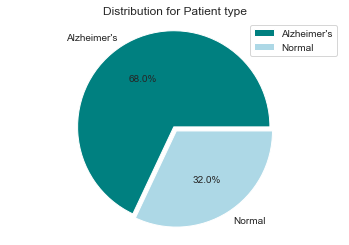

In [11]:
#### Distribution for patients & control group

print("Number of AD patients:", len(ad)) #136
print("Number of Normal patients:", len(control)) #64

labels = "Alzheimer's", "Normal"
sizes = [68, 32]

explode = (0, 0.05)

plt.pie(sizes, explode = explode, labels = labels, colors = ['teal','lightblue'], autopct ='%1.1f%%')
plt.title('Distribution for Patient type')

plt.axis('equal')
plt.legend()
plt.show()


In [12]:
#### Gender Distribution

[136.  64.]


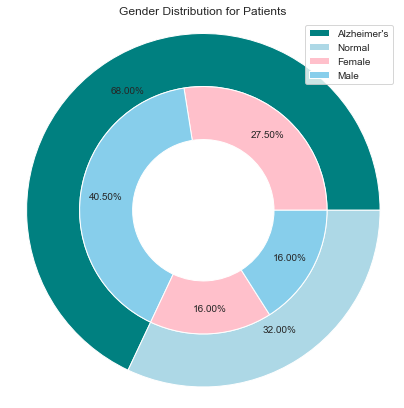

In [13]:
# Gender Distribution
size = 0.3
vals = np.array([[55.,81.],[32.,32.]])

print(vals.sum(axis = 1))

plt.figure(figsize=(7,7),dpi=72)
plt.pie(vals.sum(axis=1),radius=1,wedgeprops=dict(width=size,edgecolor='w'), colors= ['teal','lightblue'],autopct='%.2f%%',pctdistance=0.8)

labels = "Alzheimer's", "Normal","Female", "Male"
plt.pie(vals.flatten(),radius=1-size,wedgeprops=dict(width=size,edgecolor='w'),colors= ['pink','skyblue'],autopct='%.2f%%',pctdistance=0.8)


plt.axis('equal')
plt.legend(labels=labels)
plt.title('Gender Distribution for Patients')
plt.show()

Number of AD females: 55
Number of AD males: 81


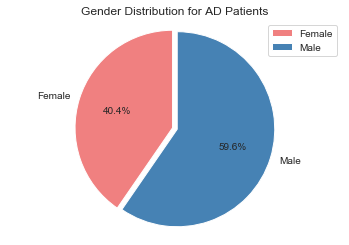

Number of control females: 32
Number of control males: 32


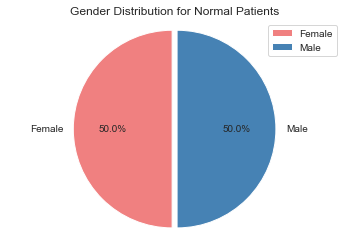

In [14]:
#plot1: Gender Distribution for AD Patients
fig1,ax1 = plt.subplots()

ad_female = ad[ad.Gender == 'F']
ad_male = ad[ad.Gender == 'M']

print("Number of AD females:", len(ad_female)) #55
print("Number of AD males:", len(ad_male)) #81

labels = "Female", "Male"

sizes = [40.4, 59.6]

explode = (0, 0.05)

plt.pie(sizes, explode = explode,colors = ['lightcoral','steelblue'], labels=labels,autopct ='%1.1f%%', startangle = 90)
plt.title('Gender Distribution for AD Patients')

plt.axis('equal')
plt.legend()
plt.show()


#plot2: Gender Distribution for Normal Patients
fig2,ax2 = plt.subplots()


print("Number of control females:", len(control_female)) #32
print("Number of control males:", len(control_male)) #32

labels = "Female", "Male"

sizes = [50, 50]

explode = (0, 0.05)

plt.pie(sizes, explode = explode, colors = ['lightcoral','steelblue'], autopct ='%1.1f%%',labels=labels, startangle = 90)
plt.title('Gender Distribution for Normal Patients')

plt.axis('equal')
plt.legend()
plt.show()

In [15]:
#### Relationship between features
##### Gender & Age

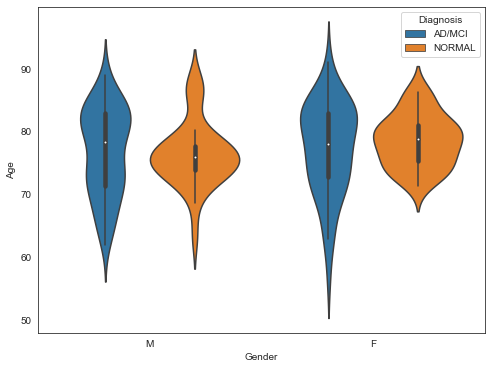

In [26]:
# Violin Plot - Gender & Age Distribution among AD Patients
plt.figure(figsize=(8,6),dpi=72)
sns.violinplot(x = "Gender",y = "Age", hue = "Diagnosis",data=dat_all)

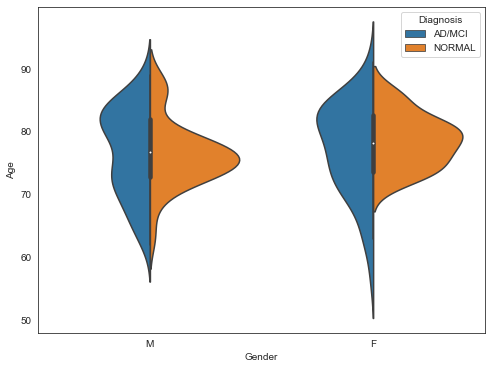

In [27]:
plt.figure(figsize=(8,6),dpi=72)
ax=sns.violinplot(x = "Gender",y = "Age",data=dat_all,hue="Diagnosis",split=True)

In [18]:
##### Age & Diagnosis

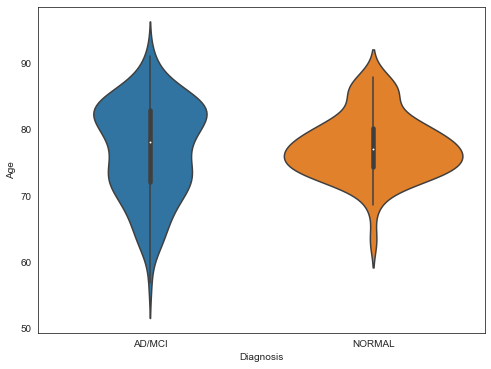

In [19]:
# Violin Plot - Age & Diagnosis Distribution
plt.figure(figsize=(8,6),dpi=72)
sns.violinplot(x = "Diagnosis",y = "Age", data=dat_all)

### Comparison between AD and control group
- violin/box plots
- z-score barcodes

In [20]:
# split patient info and volume data
ad_info = ad[info]
ad_volume = ad[rois]
control_info = control[info]
control_volume = control[rois]

In [21]:
#ad_volume

In [22]:
#control_volume

In [23]:
# create new df with mean and standard deviation for both groups
mean_std = pd.DataFrame({'ad_mean':ad_volume.mean(), 'ad_std':ad_volume.std(), 
                         'control_mean':control_volume.mean(), 'control_std':control_volume.std()})
#mean_std

KeyError: 0

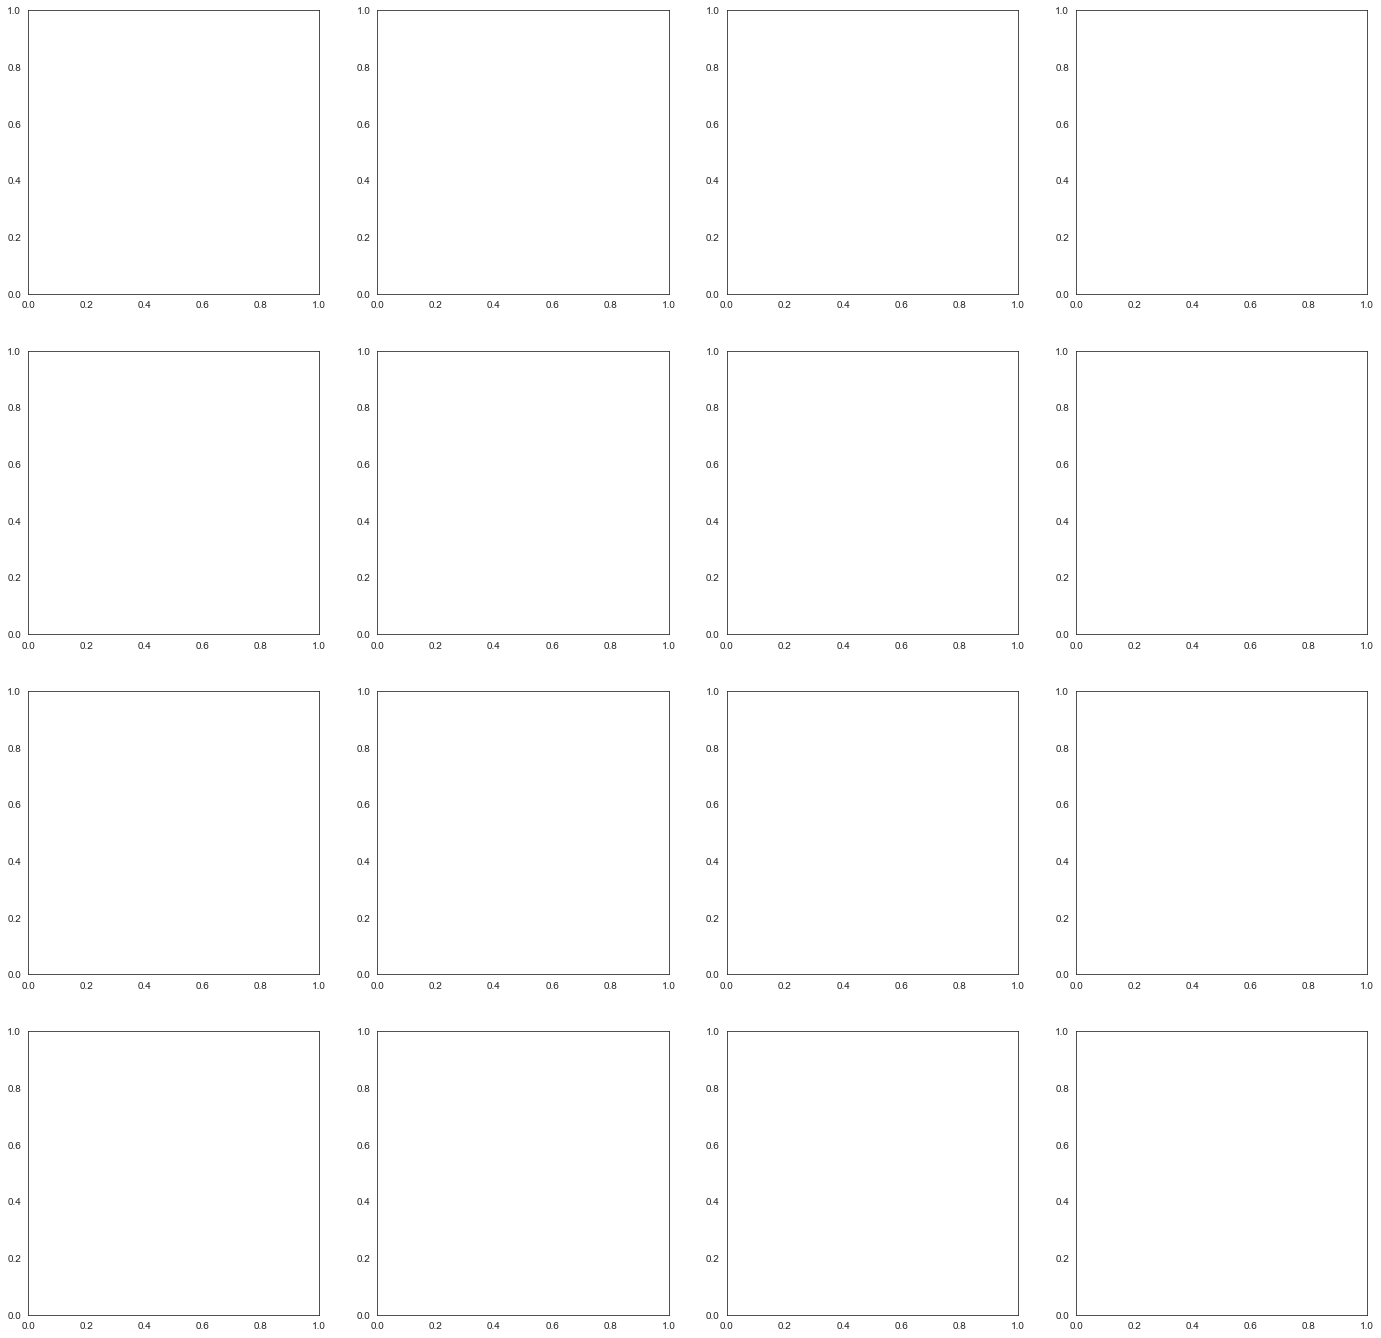

In [24]:
#violin plot to show the differences in structure volumes between AD and control group
#contact Chenyu Gao if you find anything wrong in this block

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(24, 24))

# plot violin plot
for i in range(0,16):
    compare = [ad_volume.iloc[:,i],control_volume.iloc[:,i]] #collect data from AD and control group
    axes[i//4,i%4].violinplot(compare,
                   showmeans=False,
                   showmedians=True) #loop and plot
    axes[i//4,i%4].set_title(control_volume.columns[i])
    axes[i//4,i%4].set_xlabel('Group')
    axes[i//4,i%4].set_ylabel('Structure Volume')
    axes[i//4,i%4].yaxis.grid(True) #add horizontal grid line

# add x-tick labels
plt.setp(axes, xticks=[1,2],
         xticklabels=['AD', 'Control'])

plt.show()

In [ ]:
# box plot may look more scientific but contain less information I think
#contact Chenyu Gao if you find anything wrong in this block

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(24, 24))

#plot box plot
for i in range(0,16):
    compare = [ad_volume.iloc[:,i],control_volume.iloc[:,i]] #collect data from AD and control group
    axes[i//4,i%4].boxplot(compare)#loop and plot
    axes[i//4,i%4].set_title(control_volume.columns[i])
    axes[i//4,i%4].set_xlabel('Group')
    axes[i//4,i%4].set_ylabel('Structure Volume')
    axes[i//4,i%4].yaxis.grid(True) #add horizontal grid line

# add x-tick labels
plt.setp(axes, xticks=[1,2],
         xticklabels=['AD', 'Control'])

plt.show()


In [ ]:
# calculate z-scores for each patient
ad_zscore = ad_volume.apply(zscore)
control_zscore = control_volume.apply(zscore)

In [ ]:
#ad_zscore

In [ ]:
#control_zscore

In [ ]:
# heat map for all Alzheimer's patients
ax1 = sns.heatmap(ad_zscore, robust=True, center=0)
ax1.set(title = "z-score Barcodes for Alzheimer's Patients");

In [ ]:
# heat map for all control patients
ax2 = sns.heatmap(control_zscore, robust=True, center=0)
ax2.set(title = "z-score Barcodes for Control Patients");

In [ ]:
# selected heat maps
fig, axn = plt.subplots(5,1)
cbar_ax = fig.add_axes([0.95, 0.13, 0.03, .73])

plt.subplot(5,1,1)
sns.heatmap(ad_zscore.iloc[1:2], xticklabels= False, vmin=-4, vmax=4, center=0, cbar=False)
plt.yticks(rotation=0)

plt.subplot(5,1,2)
sns.heatmap(ad_zscore.iloc[2:3], xticklabels= False, vmin=-4, vmax=4, center=0, cbar=False)
plt.yticks(rotation=0)

plt.subplot(5,1,3)
sns.heatmap(ad_zscore.iloc[3:4], xticklabels= False, vmin=-4, vmax=4, center=0, cbar=False)
plt.yticks(rotation=0)

plt.subplot(5,1,4)
sns.heatmap(ad_zscore.iloc[4:5], xticklabels= False, vmin=-4, vmax=4, center=0, cbar=False)
plt.yticks(rotation=0)

plt.subplot(5,1,5)
sns.heatmap(ad_zscore.iloc[5:6], vmin=-4, vmax=4, center=0, cbar_ax=cbar_ax)
plt.yticks(rotation=0) 

fig.suptitle('z-scores for Selected Alzheimer\'s Patients');